# Curso de Métodos Cuantitativos: Jarque-Bera
__autor: Omar de la Sota__

__correo: aozoro@gmail.com__

## Momentos respecto al origen
Dada una muestra aleatoria de tamaño $n$ el momento muestral $r$-ésimo se calcula mediante
$$\hat{m}_{r}=\frac{1}{n} \sum_{i=1}^{n} x_{i}^{r} $$

donde el momento $\hat{m}_{1}$ corresponde a la media $\bar{x}$.

In [1]:
#momentos respecto al origen
momentoOrigen <- function(x,r=1){
  n <- length(x)
  suma <- 0
  for (ii in 1:n) {
     suma <- suma+(x[ii])^r
  }
  return(round(suma/n,12))
}

In [2]:
#ejemplo: el promedio de 1,2,3 deberia salir 2 y su segundo momento central es el promedio de 1,4,9 que sería 14/3

a <- c(1,2,3)
momentoOrigen(a,1)
momentoOrigen(a,2)

[1] 2

[1] 4.666667

## Momentos respecto a la media
Dada una muestra aleatoria de tamaño $n$ el momento muestral $r$-ésimo se calcula mediante
$$\hat{\mu}_{r}=\frac{1}{n}\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{r}$$
donde el momento $\hat{\mu}_{1}$ es igual a cero y $\hat{\mu}_{2}$ corresponde a la varianza sesgada $\hat{\sigma}^2$ (o asintóticamente insesgada).

In [3]:
#momentos respecto a la media
momentoMedia <- function(x,r=2){
  n <- length(x)
  media <- momentoOrigen(x,1)
  suma <- 0
  for (ii in 1:n) {
    suma <- suma+(x[ii]-media)^r
  }
  return(round(suma/n,12))
}

In [4]:
# ejemplo: las desviaciones son -1,0,1 su primero momento es 0 y el segundo será 2/3
a <- c(1,2,3)
momentoMedia(a,1)
momentoMedia(a,2)

[1] 0

[1] 0.6666667

## Test de Jarque-Bera

La prueba de Jarque-Bera es una prueba de bondad de ajuste para comprobar si una muestra de datos tiene la asimetría y la curtosis de una distribución normal. El estadistico $JB$ se define como

$$JB=\frac{n}{6}\left(S^{2}+\frac{1}{4}(K-3)^{2}\right)$$

donde

n es el número de observaciones, $S$ es una medida de asimetría medida como 
$$S=\frac{\hat{\mu}_{3}}{\hat{\mu}_{2}^{3/2}}=\frac{\frac{1}{n}\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{3}}{\left(\frac{1}{n}\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\right)^{3/2}}$$

y $K$ es una medida de curtosis medida como
$$K=\frac{\hat{\mu}_{4}}{\hat{\mu}_{2}^{2}}=\frac{\frac{1}{n}\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{4}}{\left(\frac{1}{n}\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\right)^{2}}$$

Jarque & Bera (1980) demostraron que el estadistico $JB$ se distribuye asintóticamente como una distribución chi cuadrado con dos grados de libertad y puede usarse para probar la hipótesis nula de que las observaciones pertenecen a una distribución normal. 

In [5]:
#estadistico JB y su pvalue
JarqueBera <-function(x){
  n <- length(x)
  
  mu2 <- momentoMedia(x,2)
  mu3 <- momentoMedia(x,3)
  mu4 <- momentoMedia(x,4)
  
  S <- mu3/(mu2^(3/2))
  K <- mu4/(mu2^2)
  
  JB <- (n/6)*(S^2+(K-3)^2/4)
  pvalue<-1-pchisq(JB,2)
  return(list("statJB"=JB,"pvalue"=pvalue))
}

In [6]:
#ejemplo 

#Primero creamos 1000 números aleatorios uniformes entre 0 y 1 
n <- 1000
vectorUnif <- runif(n)

#usamos la función inversa de la normal para obtener 1000 números aleatorios de media 10 y varianza 9
vectorNorm <- qnorm(vectorUnif,mean=10,sd=3)


In [7]:
#mostramos algunos estadísticos
summary(vectorNorm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.111   8.016  10.157  10.104  12.062  19.674 

In [8]:
#Mostramos su estadistico Jarque-Bera y pvalue

JarqueBera(vectorNorm)

$statJB
[1] 0.1779176

$pvalue
[1] 0.9148833

In [9]:
#sabemos que el chi crítico es a un 95% de confianza
qchisq(0.95,df=2)

[1] 5.991465

## Elipsis de confianza del estadístico JB
Sea $q$ el valor crítico elegido a partir del cual se empieza a rechazar la hipotesis nula de normalidad. Entonces
$$\frac{n}{6}\left(S^{2}+\frac{1}{4}(K-3)^{2}\right) < q$$

formando una función conocida
$$\frac{S^{2}}{6q\,/n}+\frac{(K-3)^{2}}{24q\,/n}<1$$

la cual representa una elipse centrada en el origen
$$\frac{x^{2}}{a^{2}}+\frac{y^{2}}{b^{2}}=1$$

Esta centrado en S=0 y K=3, es decir, según un distribución normal. Donde $a=\sqrt{6q/n}$ y $b=\sqrt{24q/n}$ representan los semiejes de la elipse. Todos los puntos dentro de la elipsis serán distribuciones normales según el test de Jarque-Bera.

In [10]:
#elipsis de confianza de JB
n <- 1000
conf <- 0.95

q <- qchisq(conf,df=2)

a <-  sqrt(6*q/n)
b <-  sqrt(24*q/n)


dominio1 <-seq(-a,a,length.out = 200)
rango1 <- b*(1-dominio1^2/a^2)^0.5

#contorno
dominio <- c(dominio1,dominio1[200:1])
rango <- c (rango1, -rango1[200:1])

x <- runif(100,-a,a)
y <- runif(100,-b,b)
data <- data.frame("y"=y,"x"=x)

#simulación
data_sub <- subset(data, x^2/a^2+y^2/b^2 < 1)

En el gráfico, vemos que a la izquierda del eje-$y$ donde los valores de $x$ son negativos significan asimetria hacia la izquierda y la derecha del eje-$y$ signifcan asimetria a la derecha. 

De manera análoga arriba del eje-$x$ quiere decir que $K>3$, es decir, es leptocúrtica y si esta abajo del eje-$x$ es platicúrtica.

La elipse indica la tolerancia de de asimetria y curtosis para seguir siendo considera una distribución normal

Loading required package: carData


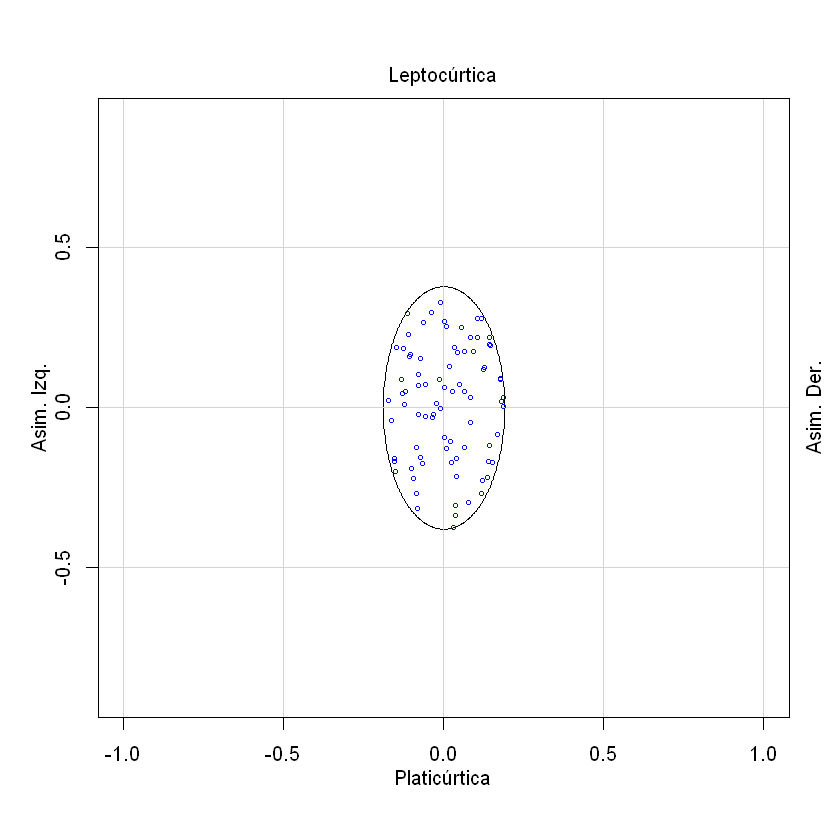

In [11]:
#gráfico
library("car")

par(new=FALSE)
plot(dominio,rango, type="l",asp=1,axes=FALSE,xlab="",ylab="",xlim = c(-1,1), ylim = c(-0.4,0.4))
par(new=TRUE)
scatterplot(y~x, regLine=FALSE, smooth=FALSE,xlab="",ylab="", boxplots=FALSE, data=data_sub,asp=1,cex=0.6,xlim = c(-1,1), ylim = c(-0.4,0.4))

mtext(c("Platicúrtica", "Asim. Izq.", "Leptocúrtica", "Asim. Der."),
side = c(1, 2, 3, 4), col = "black", line = c(2,2,0.5,0.5), cex = 1)

El área de un elipse es 
$$S=\pi * a * b$$
en esta aplicación
$$ S= \sqrt{\frac{144q^2}{n^2}}$$
así
$$ S= \frac{12q}{n}$$

es decir, mientras aumente el nivel de confianza, aumentará el área, es decir habrá más tolerancia. Y mientras más aumente el tamaño de la muestra habrá menos tolerancia. 

También podemos destacar que 
$$
\frac{a}{b}=\frac{\sqrt{6q\,/n}}{\sqrt{24q\,/n}}=\frac{1}{2}
$$

la razón de los semiejes siempre será de 1 a 2 independimente del nivel de confianza y el tamaño de muestra. También podemos notar que el test de Jarque-Bera tolera más la curtosis que la asimetría.